Evaluating Logistic Regression with Cross-Validation
Exercise: Implement logistic regression and evaluate the model using k-fold cross-validation.
Compare the cross-validation scores with a single train-test split evaluation.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


C:\Users\khali\AppData\Local\Temp\ipykernel_7732\1146992701.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\khali\AppData\Local\Temp\ipykernel_7732\1146992701.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
X = df.drop(columns=['Survived'])  
y = df['Survived']  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(max_iter=1000)

In [12]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.78212291 0.78651685 0.78089888 0.76966292 0.81460674]
Average cross-validation score: 0.786761659657272


In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')

Test accuracy: 0.8100558659217877


Analyzing Overfitting and Underfitting in Decision Trees
Exercise: Train a decision tree classifier with varying depths to analyze overfitting and underfitting. 
Plot training and validation accuracies to visualize the effects.


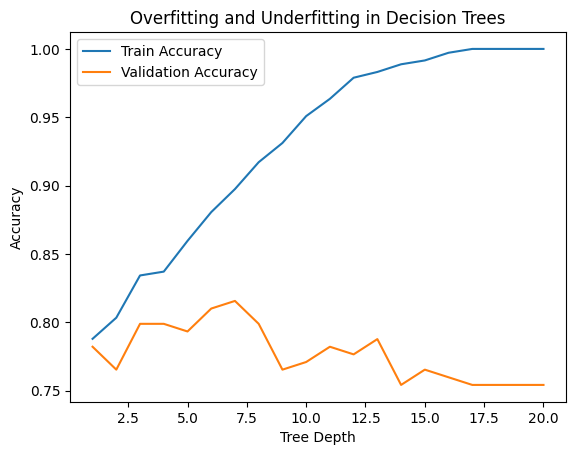

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(1, 21)
train_accuracies = []
val_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
    val_accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Overfitting and Underfitting in Decision Trees')
plt.show()


Calculating Precision, Recall, and F1-Score for Logistic Regression
Exercise: Implement logistic regression and calculate precision, recall, and F1-score for the model. 
Tip: Discuss how these metrics provide insights into model performance in  your week article.


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.79
Recall: 0.74
F1 Score: 0.76


ROC Curve Analysis for Decision Trees
Exercise: Implement a decision tree classifier and plot the ROC curve.
Compute the AUC (Area Under the Curve) and interpret the results.


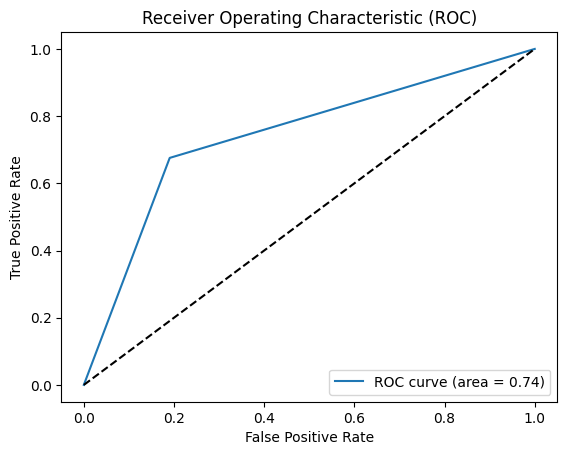

AUC: 0.74


In [17]:
from sklearn.metrics import roc_curve, auc

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')


Comparing Model Performance with and without Cross-Validation
Exercise: Train logistic regression and decision tree models with and without cross-validation. 
Compare their performance metrics, including accuracy, precision, and recall.


In [18]:
# Logistic Regression without Cross-Validation
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Logistic Regression Precision: {precision_score(y_test, y_pred)}')
print(f'Logistic Regression Recall: {recall_score(y_test, y_pred)}')

Logistic Regression Accuracy: 0.8100558659217877
Logistic Regression Precision: 0.7857142857142857
Logistic Regression Recall: 0.7432432432432432


In [19]:
v_scores = cross_val_score(model, X, y, cv=5)
print(f'Logistic Regression Cross-validation accuracy: {cv_scores.mean()}')

Logistic Regression Cross-validation accuracy: 0.786761659657272


In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Decision Tree Precision: {precision_score(y_test, y_pred)}')
print(f'Decision Tree Recall: {recall_score(y_test, y_pred)}')

# Decision Tree with Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f'Decision Tree Cross-validation accuracy: {cv_scores.mean()}')

Decision Tree Accuracy: 0.7541899441340782
Decision Tree Precision: 0.7142857142857143
Decision Tree Recall: 0.6756756756756757
Decision Tree Cross-validation accuracy: 0.7342602473165526
